In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [26]:
#Load training dataset 

df_train = pd.read_csv("sales_train.csv")
df_test = pd.read_csv("sales_test.csv")


In [28]:
df_train.head(), df_test.head()

(         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
 0  02.01.2013               0       59    22154      999.00           1.0
 1  03.01.2013               0       25     2552      899.00           1.0
 2  05.01.2013               0       25     2552      899.00          -1.0
 3  06.01.2013               0       25     2554     1709.05           1.0
 4  15.01.2013               0       25     2555     1099.00           1.0,
    ID  shop_id  item_id
 0   0        5     5037
 1   1        5     5320
 2   2        5     5233
 3   3        5     5232
 4   4        5     5268)

### Preprocessing Training Data Set

In [33]:
df_train.describe()


,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [34]:
# as item_price and item_cnt_day have negative values which not make sense, so we make the positive

df_train['item_price'] = df_train['item_price'].abs()

df_train['item_cnt_day'] = df_train['item_cnt_day'].abs()


In [36]:
df_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.247778e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.616391e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [31]:
# no null values present
df.isnull().sum()

date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [38]:
# in percent null values
null_percent=100*(df_train.isnull().sum()/len(df_train))
null_percent


date              0.0
date_block_num    0.0
shop_id           0.0
item_id           0.0
item_price        0.0
item_cnt_day      0.0
dtype: float64

### 
now since we have to predict item_cnt_month therefore we have to convert item_cnt_day in monthwise. 
we can group data either using only num_block date to get sum of item_cnt or we can group by combining
block, shop id and item id.


In [41]:
df_train = df_train.groupby(['date_block_num','shop_id', 'item_id']).agg({'item_price': 'last', 'item_cnt_day': 'sum'}).reset_index()

#updating column name to item_cnt_month
df_train = df_train.rename(columns = {'item_cnt_day': 'item_cnt_month'})

df_train.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month
0,0,0,32,221.0,6.0
1,0,0,33,347.0,3.0
2,0,0,35,247.0,1.0
3,0,0,43,221.0,1.0
4,0,0,51,127.0,2.0


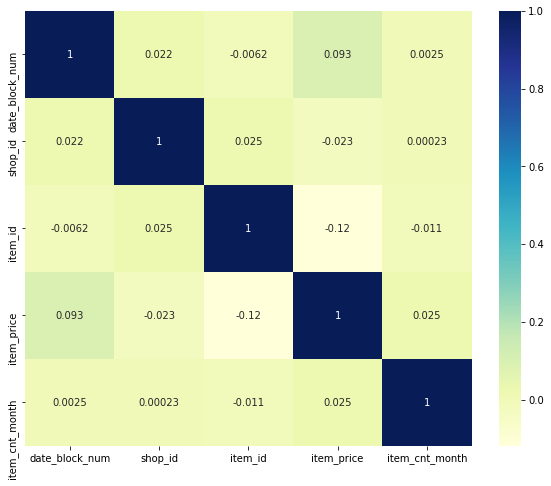

In [44]:
# lets check the correlations

correlation=df_train.corr()

#Plotting correlation
plt.figure(figsize=(10,8))
corr_heatmap=sns.heatmap(correlation,annot=True,cmap="YlGnBu")

## Preprocessing test data set

In [45]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


it has some missing columns:
date_block_num is future so we add 34 

In [47]:
df_test['date_block_num'] = 34
df_test = df_test[['date_block_num', 'shop_id', 'item_id']]
df_test.head()

,date_block_num,shop_id,item_id
0,34,5,5037
1,34,5,5320
2,34,5,5233
3,34,5,5232
4,34,5,5268


In [48]:
#now we add item_price from training data df_train such that the vales are latest

item_price=dict(df_train.groupby('item_id')['item_price'].last().reset_index().values)
df_test['item_price']=df_test.item_id.map(item_price)
print(df_test)

        date_block_num  shop_id  item_id  item_price
0                   34        5     5037      1499.0
1                   34        5     5320         NaN
2                   34        5     5233      1199.0
3                   34        5     5232      1199.0
4                   34        5     5268         NaN
...                ...      ...      ...         ...
214195              34       45    18454        99.0
214196              34       45    16188      1359.0
214197              34       45    15757       229.0
214198              34       45    19648        79.2
214199              34       45      969       198.0

[214200 rows x 4 columns]


In [50]:
#imputing missing values by median
df_test['item_price'] = df_test['item_price'].fillna(df_test['item_price'].median())
df_test.isnull().sum()

date_block_num    0
shop_id           0
item_id           0
item_price        0
dtype: int64

In [51]:
# saving these train and test file for back up use in dir

df_train.to_csv('train.csv', index = False)
df_test.to_csv('test.csv', index = False)